<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/predicci%C3%B3n_de_precios_de_viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [6]:
data = '/content/drive/MyDrive/Coding Dojo /Codigo /week6/kc_house_data.csv'
df = pd.read_csv(data)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
df.shape

(21613, 21)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.shape

(21613, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
Fecha = np.unique(df['date'])
Fecha

array(['20140502T000000', '20140503T000000', '20140504T000000',
       '20140505T000000', '20140506T000000', '20140507T000000',
       '20140508T000000', '20140509T000000', '20140510T000000',
       '20140511T000000', '20140512T000000', '20140513T000000',
       '20140514T000000', '20140515T000000', '20140516T000000',
       '20140517T000000', '20140518T000000', '20140519T000000',
       '20140520T000000', '20140521T000000', '20140522T000000',
       '20140523T000000', '20140524T000000', '20140525T000000',
       '20140526T000000', '20140527T000000', '20140528T000000',
       '20140529T000000', '20140530T000000', '20140531T000000',
       '20140601T000000', '20140602T000000', '20140603T000000',
       '20140604T000000', '20140605T000000', '20140606T000000',
       '20140607T000000', '20140608T000000', '20140609T000000',
       '20140610T000000', '20140611T000000', '20140612T000000',
       '20140613T000000', '20140614T000000', '20140615T000000',
       '20140616T000000', '20140617T0000

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
dates = LabelEncoder()
dates_Labels = dates.fit_transform(df['date'])
dates_mappings = {index:label for index, label in enumerate(dates.classes_)}
dates_mappings

{0: '20140502T000000',
 1: '20140503T000000',
 2: '20140504T000000',
 3: '20140505T000000',
 4: '20140506T000000',
 5: '20140507T000000',
 6: '20140508T000000',
 7: '20140509T000000',
 8: '20140510T000000',
 9: '20140511T000000',
 10: '20140512T000000',
 11: '20140513T000000',
 12: '20140514T000000',
 13: '20140515T000000',
 14: '20140516T000000',
 15: '20140517T000000',
 16: '20140518T000000',
 17: '20140519T000000',
 18: '20140520T000000',
 19: '20140521T000000',
 20: '20140522T000000',
 21: '20140523T000000',
 22: '20140524T000000',
 23: '20140525T000000',
 24: '20140526T000000',
 25: '20140527T000000',
 26: '20140528T000000',
 27: '20140529T000000',
 28: '20140530T000000',
 29: '20140531T000000',
 30: '20140601T000000',
 31: '20140602T000000',
 32: '20140603T000000',
 33: '20140604T000000',
 34: '20140605T000000',
 35: '20140606T000000',
 36: '20140607T000000',
 37: '20140608T000000',
 38: '20140609T000000',
 39: '20140610T000000',
 40: '20140611T000000',
 41: '20140612T000000',
 4

In [14]:
df['date'] = dates_Labels

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,220,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,290,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,220,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,283,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df.shape

(21613, 21)

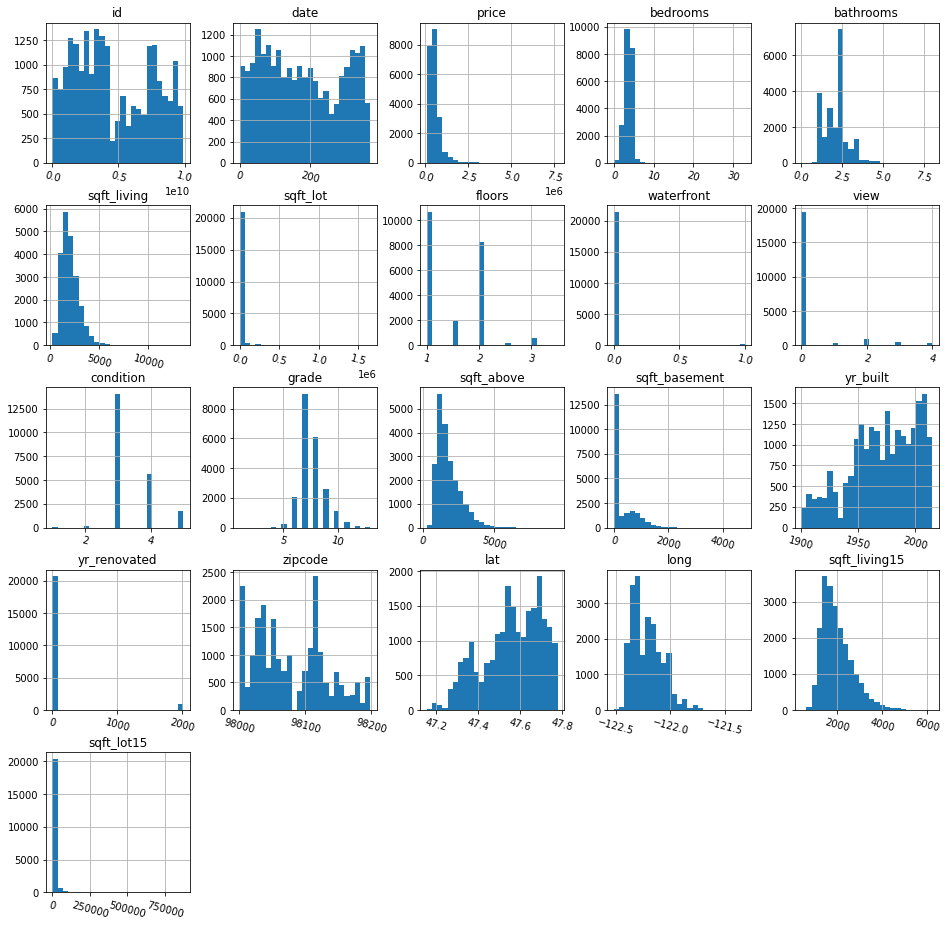

In [17]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [18]:
df = df.drop(['long'], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,1340,5650
1,6414100192,220,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,1690,7639
2,5631500400,290,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,2720,8062
3,2487200875,220,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,1360,5000
4,1954400510,283,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,1800,7503


In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,1340,5650
1,6414100192,220,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,1690,7639
2,5631500400,290,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,2720,8062
3,2487200875,220,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,1360,5000
4,1954400510,283,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,1800,7503


In [20]:
X = df.loc[:, df.columns != 'price']

In [21]:
X.shape

(21613, 19)

In [22]:
y = df.loc[:, 'price'].values

In [23]:
y.shape

(21613,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [25]:
clf = RandomForestClassifier(n_estimators=10,
                             bootstrap=True,
                             oob_score=True)


In [26]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(n_estimators=10, oob_score=True)

In [27]:
# Predecir para una observación
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([360000.])

In [28]:
predi_sale=clf.predict(X_test[:])

In [31]:
predi_sale

array([305000., 450000., 722000., ..., 240000., 475000., 322000.])

In [29]:
pd.DataFrame(y_train)[0].value_counts(normalize = False)

350000.0     130
450000.0     128
425000.0     118
500000.0     114
325000.0     112
            ... 
1851000.0      1
669500.0       1
541100.0       1
3168750.0      1
544900.0       1
Name: 0, Length: 3398, dtype: int64

In [30]:
score = clf.score(X_test, y_test)
score

0.010547742413027387

In [31]:
clf.oob_score_

0.007526682707138009

In [33]:
estimator_range = [1] + list(range(1, 21613, 1000))
estimator_range

[1,
 1,
 1001,
 2001,
 3001,
 4001,
 5001,
 6001,
 7001,
 8001,
 9001,
 10001,
 11001,
 12001,
 13001,
 14001,
 15001,
 16001,
 17001,
 18001,
 19001,
 20001,
 21001]

In [ ]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

In [29]:
Comparacion_Ventas = pd.DataFrame(df['price'])
Comparacion_Ventas

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [30]:
Comparacion_Ventas ['Price_Predic'] = pd.DataFrame(predi_sale)
Comparacion_Ventas.head(100)

,price,Price_Predic
0,221900.0,305000.0
1,538000.0,450000.0
2,180000.0,722000.0
3,604000.0,148000.0
4,510000.0,230000.0
...,...,...
95,905000.0,350000.0
96,247500.0,290000.0
97,199000.0,236000.0
98,314000.0,237000.0


In [ ]:
    ¿Cuáles son las características más importantes de tu modelo?
elimine la comunna long ya que unicamnmete tenia valores negativos, el numero de estimaciones le ajute a 10 

    ¿Qué otros parámetros podrías haber intentado ajustar?
normalice la informacion 